In [33]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import aotools
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.integrate import trapz

# Test that linear fit and assignment of slopes happens correctly

In [34]:
C_mat_true = np.array([[-4.2, 0.31, 7.2],[0.43, -10.2, 3.97],[6.12, -0.94, -5.22]])

pos_array = np.zeros((9,3))
pos_array[0,0] = -0.3
pos_array[1,0] = 0.0
pos_array[2,0] = 0.3
pos_array[3,1] = -0.3
pos_array[4,1] = 0.0
pos_array[5,1] = 0.3
pos_array[6,2] = -0.3
pos_array[7,2] = 0.0
pos_array[8,2] = 0.3

pokeSteps = np.linspace(-0.3,0.3,3)
numPokeSteps = 3

all_z_amp = np.zeros((3,9))

for ii in range(9):
    all_z_amp[:,ii] = np.dot(C_mat_true, pos_array[ii,:]) + (np.random.rand(3)/10.0)
    
all_z_amp = all_z_amp.T
C_mat_calc = np.zeros((3,3))
z_amp = np.zeros((3,3))
slopes = np.zeros(3)
intercepts = np.zeros(3)
r_values = np.zeros(3)
p_values = np.zeros(3)
std_errs = np.zeros(3)
    
for ii in range(3):
    z_amp[:,:] = all_z_amp[(ii*numPokeSteps):((ii+1)*numPokeSteps),:]
    #Fit a linear regression to get the relationship between actuator position and Zernike mode amplitude
    for kk in range(3):
        slopes[kk], intercepts[kk], r_values[kk], p_values[kk], std_errs[kk] = stats.linregress(pokeSteps,z_amp[:,kk])
    #print slopes[:]
    #Input obtained slopes as the entries in the control matrix
    C_mat_calc[:,ii] = slopes[:]
    
print C_mat_calc
print C_mat_true
print np.linalg.pinv(C_mat_calc)
print np.linalg.pinv(C_mat_true)

[[ -4.15991646   0.33834432   7.1663029 ]
 [  0.45108945 -10.13608788   3.97993573]
 [  6.01805997  -0.92922289  -5.22317018]]
[[ -4.2    0.31   7.2 ]
 [  0.43 -10.2    3.97]
 [  6.12  -0.94  -5.22]]
[[ 0.27307562 -0.02358458  0.35669477]
 [ 0.12683387 -0.10316995  0.09540569]
 [ 0.29206946 -0.00881946  0.20255081]]
[[ 0.26442333 -0.0239001   0.34654494]
 [ 0.12317615 -0.10275121  0.0917521 ]
 [ 0.28783241 -0.00951771  0.19820078]]


# Test control matrix generation

[ 0.45094285 -2.13289283 -2.19694209 -0.86551969  1.00246165 -1.81282974
 -0.05783831  2.61873492  3.35789845]


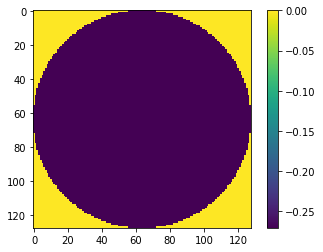

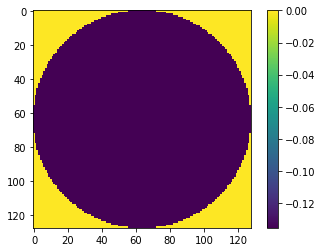

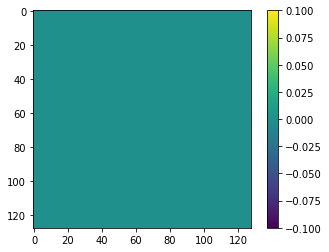

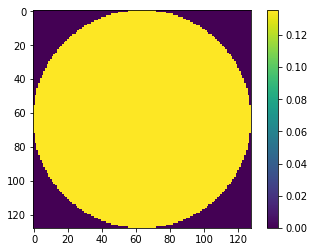

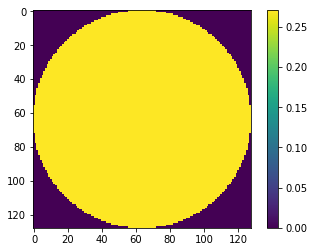

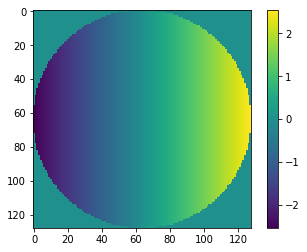

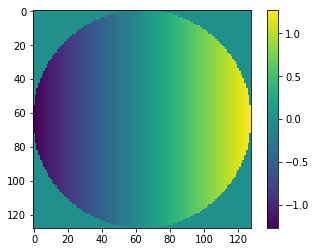

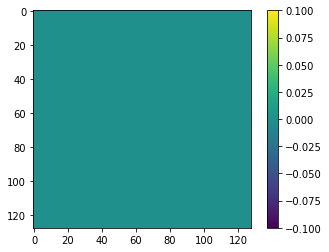

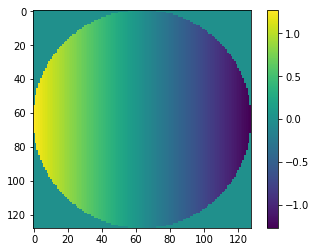

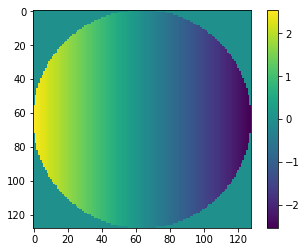

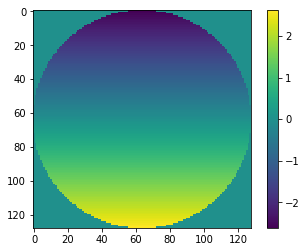

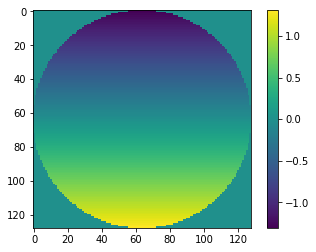

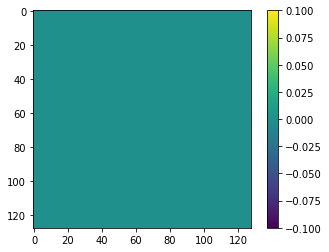

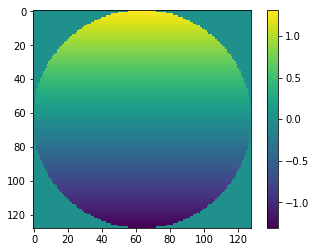

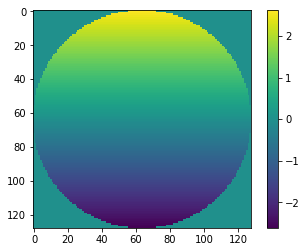

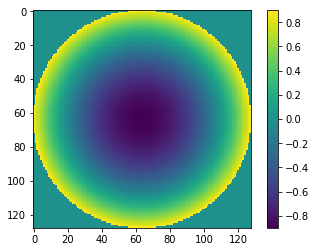

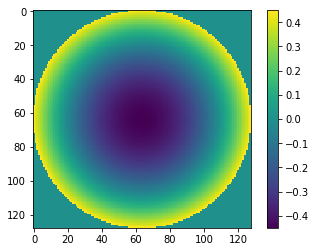

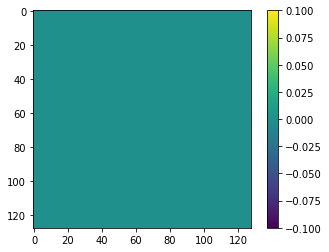

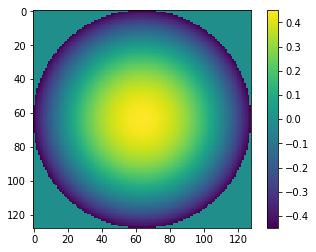

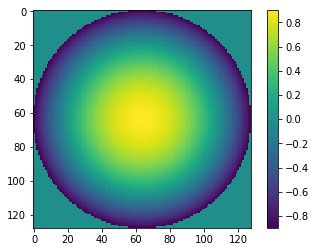

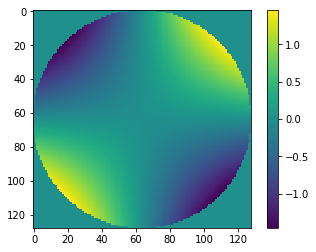

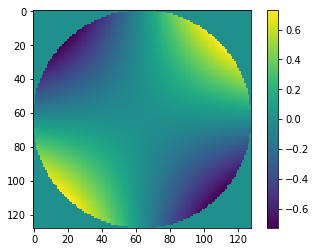

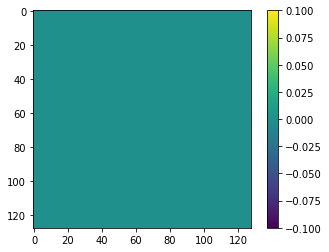

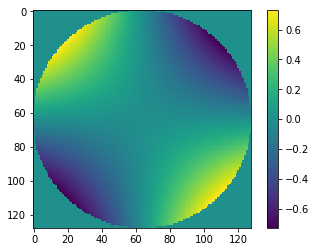

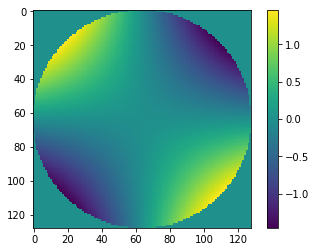

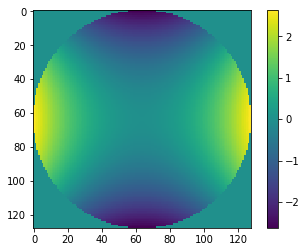

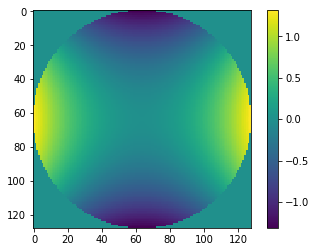

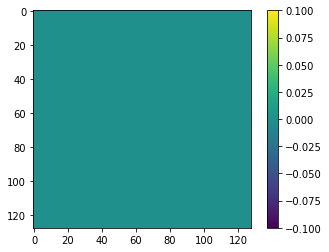

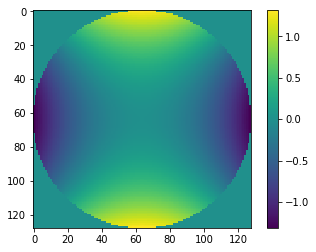

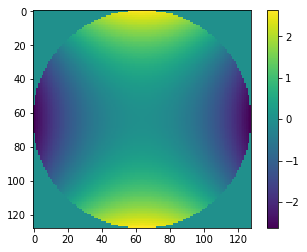

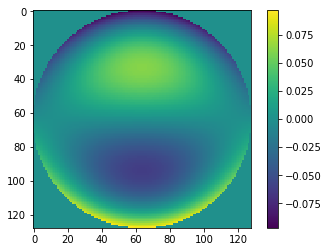

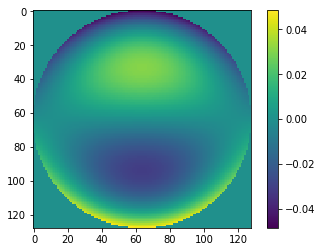

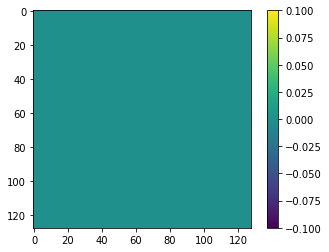

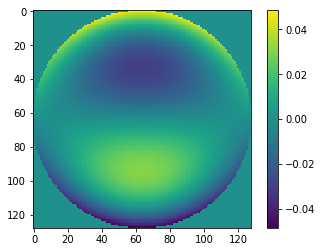

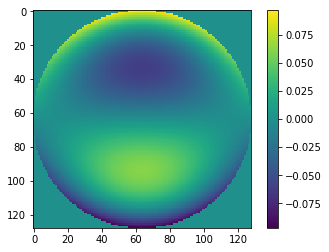

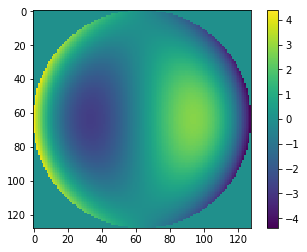

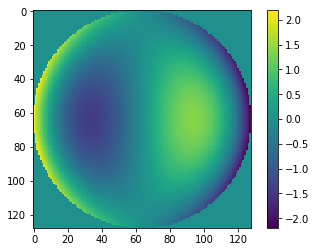

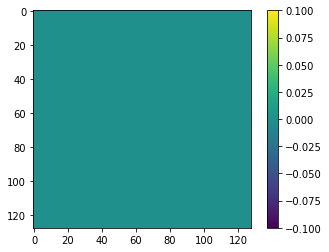

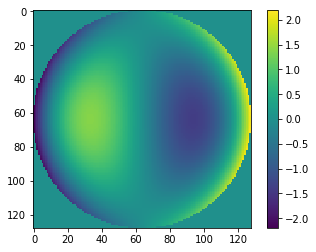

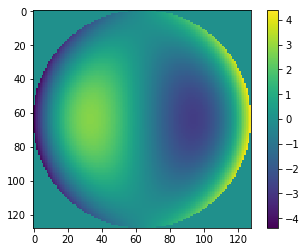

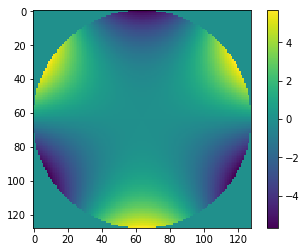

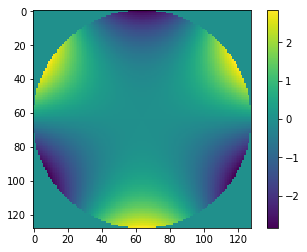

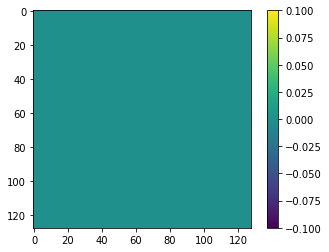

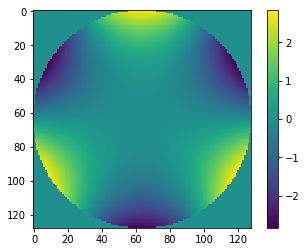

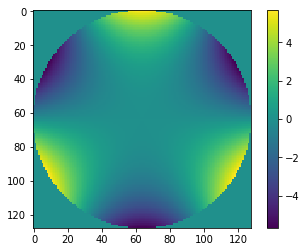

In [35]:
#Set up the ground truth
numPokeSteps = 5
pokeSteps = np.linspace(-0.6,0.6,numPokeSteps)

diameter = 128
nzernike = 9

noImages= numPokeSteps*nzernike

z_slopes_true = 2.5 * np.random.randn(nzernike)
print z_slopes_true

C_mat_true = np.zeros((nzernike,nzernike))

z_amp_true = np.zeros((noImages,nzernike))

for ii in range(nzernike):
    C_mat_true[ii,ii] = z_slopes_true[ii]
    for jj in range(numPokeSteps):
        z_amp_true[(numPokeSteps * ii) + jj, ii] = z_slopes_true[ii] * pokeSteps[jj]

controlMatrix_true = np.linalg.pinv(C_mat_true)

imStack = np.zeros((noImages,diameter,diameter))

for im in range(noImages): 
    imStack[im, :, :] = aotools.phaseFromZernikes(z_amp_true[im, :], diameter)
    plt.figure(im)
    plt.imshow(imStack[im, :, :])
    plt.colorbar()

c:\python27\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


The sum of the absolute differences between the measured Zernike modes and the true values applied is:
0.0400503246486
[ 0.99751784  0.99751784         nan  0.99751784  0.99751784  0.99694267
  0.99694267         nan  0.99694267  0.99694267  0.99694267  0.99694267
         nan  0.99694267  0.99694267  0.9965334   0.9965334          nan
  0.9965334   0.9965334   1.00337452  1.00337452         nan  1.00337452
  1.00337452  0.98944344  0.98944344         nan  0.98944344  0.98944344
  0.9962391   0.9962391          nan  0.9962391   0.9962391   0.9962391
  0.9962391          nan  0.9962391   0.9962391   0.99591571  0.99591571
         nan  0.99591571  0.99591571]


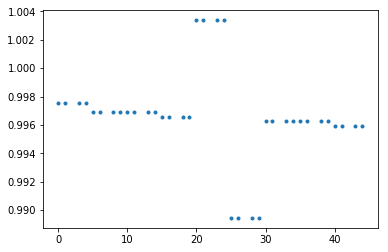

In [36]:
#Test the measured Zernike modes
all_z_amp_test = np.zeros((noImages,nzernike))

#Get the zernike modes
z_amp_ratio = []
num_pixels = np.count_nonzero(aotools.zernike(1, diameter))
for iim in range(noImages):
    zcoeffs_dbl = []
    for zz in range(1,(nzernike+1)):
        intermediate = trapz(imStack[iim, :, :] * aotools.zernike(zz, diameter))
        zcoeffs_dbl.append((trapz(intermediate) / (num_pixels)))
    all_z_amp_test[iim,:] = np.asarray(zcoeffs_dbl)
    z_amp_ratio.append(all_z_amp_test[iim,iim/numPokeSteps]/z_amp_true[iim,iim/numPokeSteps])

try:
    assert np.sum(all_z_amp_test - z_amp_true) == 0.0 
except:
    print "The sum of the absolute differences between the measured Zernike modes and the true values applied is:" 
    print np.sum(abs(all_z_amp_test) - abs(z_amp_true))

z_amp_diff = all_z_amp_test - z_amp_true

z_amp_ratio = np.asarray(z_amp_ratio)
    
#for ii in range(noImages):
#    plt.figure(ii)
#    plt.plot(all_z_amp_test[ii,:])
#    plt.plot(z_amp_true[ii,:],':')
    
print z_amp_ratio

plt.figure(noImages)
plt.plot(z_amp_ratio,'.')

Differences:
-0.00111931207879
0.00652094741753
0.00671676684914
0.00300040644429
0.00338282944468
0.0191372407925
0.000217523817538
-0.00984878796846
-0.0137146157563
Ratios:
0.997517840521
0.9969426746
0.9969426746
0.996533404753
1.00337452254
0.989443442853
0.996239104656
0.996239104656
0.995915714556


c:\python27\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
c:\python27\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in divide


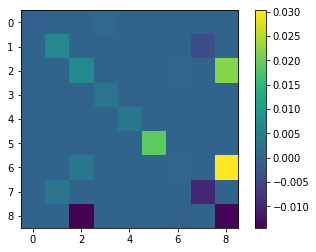

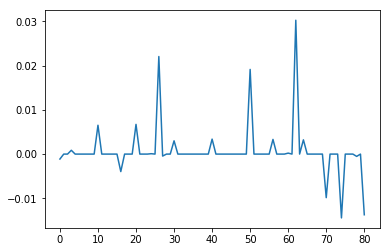

In [37]:
#Test the measured slopes
slopes = np.zeros(nzernike)
intercepts = np.zeros(nzernike)
r_values = np.zeros(nzernike)
p_values = np.zeros(nzernike)
std_errs = np.zeros(nzernike)

C_mat_test = np.zeros((nzernike,nzernike))
offsets_test = np.zeros((nzernike,nzernike))
P_tests_test = np.zeros((nzernike,nzernike))
z_amp_test = np.zeros((numPokeSteps,nzernike))

for ii in range(nzernike):
        
    z_amp_test[:,:] = all_z_amp_test[(ii*numPokeSteps):((ii+1)*numPokeSteps),:]

    #Fit a linear regression to get the relationship between actuator position and Zernike mode amplitude
    for kk in range(nzernike):
        slopes[kk], intercepts[kk], r_values[kk], p_values[kk], std_errs[kk] = stats.linregress(pokeSteps,z_amp_test[:,kk])
    #Input obtained slopes as the entries in the control matrix
    C_mat_test[:,ii] = slopes[:]
    offsets_test[:,ii] = intercepts[:]
    P_tests_test[:,ii] = p_values[:]

#print C_mat_test
#print C_mat_true

C_mat_diff = C_mat_test - C_mat_true
C_mat_ratio = C_mat_test/C_mat_true

print "Differences:"
for jj in range(nzernike):
    print C_mat_diff[jj,jj]
    
print "Ratios:"
mean_ratio = 0
for kk in range(nzernike):
    print C_mat_ratio[kk,kk]
    mean_ratio += C_mat_ratio[kk,kk]
mean_ratio = mean_ratio/nzernike

plt.figure(0)
plt.imshow(C_mat_diff)
plt.colorbar()

plt.figure(1)
plt.plot(C_mat_diff.flatten())

Differences:
0.00552029324339
-0.00143889207111
-0.00141686040685
-0.00402030852197
-0.00335491479774
-0.00588537730201
-0.0667328814062
0.00144245068249
0.00125882416576
Ratios:
1.00248933679
1.00306900258
1.00311276026
1.00347965619
0.996636826565
1.01066918703
1.00385971685
1.00377739597
1.00422700371


c:\python27\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()


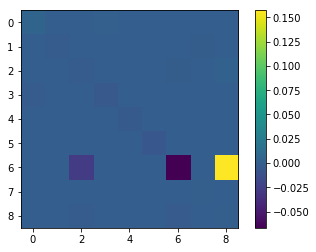

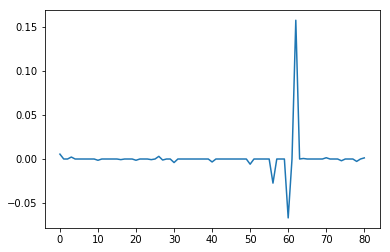

In [38]:
#Test the measured control matrix
controlMatrix_test = np.linalg.pinv(C_mat_test)

controlMatrix_diff = controlMatrix_test - controlMatrix_true

print "Differences:"
for ii in range(nzernike):
    print controlMatrix_diff[ii,ii]
    
print "Ratios:"
controlMatrix_ratio = controlMatrix_test/controlMatrix_true
for kk in range(nzernike):
    print controlMatrix_ratio[kk,kk]

plt.figure(0)
plt.imshow(controlMatrix_diff)
plt.colorbar()

plt.figure(1)
plt.plot(controlMatrix_diff.flatten())


Differences:
-0.00210036098358
0.000173222041496
0.000148322692578
-4.59629750251e-05
-0.00676294288779
-0.00397426586838
-0.00723637531395
0.000128497545925
0.000233648376221
Ratios:
0.999052857224
0.99963053595
0.999674143634
1.00003978186
0.993220409091
1.00720466738
1.00041853969
1.00033650101
1.00078456752


c:\python27\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()


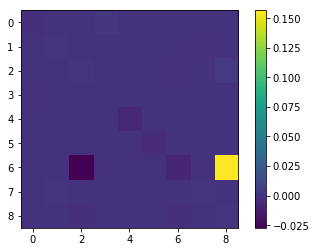

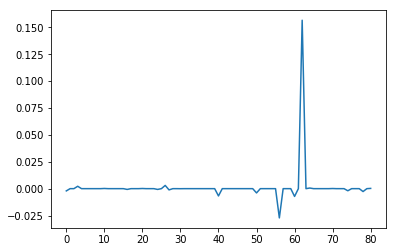

In [39]:
#Test effect of rescaling
controlMatrix_test_scaled = np.linalg.pinv(C_mat_test/mean_ratio)

controlMatrix_diff_scaled = controlMatrix_test_scaled - controlMatrix_true

print "Differences:"
for ii in range(nzernike):
    print controlMatrix_diff_scaled[ii,ii]
    
print "Ratios:"
controlMatrix_ratio_scaled = controlMatrix_test_scaled/controlMatrix_true
for kk in range(nzernike):
    print controlMatrix_ratio_scaled[kk,kk]
    
plt.figure(0)
plt.imshow(controlMatrix_diff_scaled)
plt.colorbar()

plt.figure(1)
plt.plot(controlMatrix_diff_scaled.flatten())

c:\python27\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
c:\python27\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
c:\python27\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


Percentage of non-diagonal elements with value >=1% of the true min:
0.0184547244094 = 3 pixels
Percentage of non-diagonal elements with value >=10% of the true min:
0.00615157480315 = 1 pixels
Percentage of non-diagonal elements with value >=50% of the true min:
0.00615157480315 = 1 pixels
Percentage of non-diagonal elements with value >= the true min:
0.0 = 0 pixels
Percentage of non-diagonal elements with value > the true max:
0.0 = 0 pixels
Percentage of elements the diagonal entries occupy:
0.78125 = 128 pixels


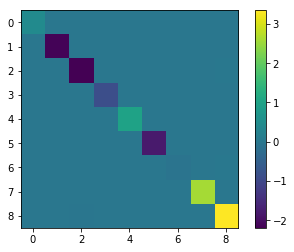

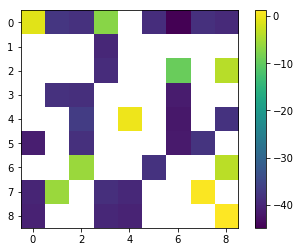

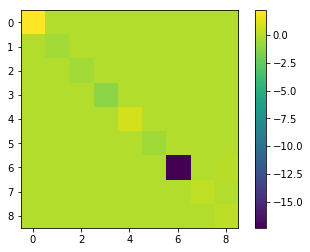

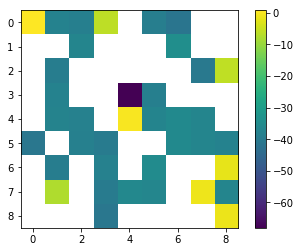

In [40]:
plt.figure(0)
plt.imshow(C_mat_test)
plt.colorbar()

plt.figure(1)
plt.imshow(np.log(C_mat_test))
plt.colorbar()

plt.figure(2)
plt.imshow(controlMatrix_test)
plt.colorbar()

plt.figure(3)
plt.imshow(np.log(controlMatrix_test))
plt.colorbar()

controlMatrix_true_diag = np.zeros(nzernike)
for ii in range(nzernike):
    controlMatrix_true_diag[ii] = controlMatrix_true[ii,ii]
CMt_min = np.min(abs(controlMatrix_true_diag))
CMt_max = np.max(abs(controlMatrix_true_diag))

controlMatrix_test_nondiag = np.zeros(np.shape(controlMatrix_test))
controlMatrix_test_nondiag[:,:] = controlMatrix_test[:,:]
for jj in range(nzernike):
    controlMatrix_test_nondiag[jj,jj] = 0

print "Percentage of non-diagonal elements with value >=1% of the true min:"
print str((len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_min/100)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_min/100)])) + " pixels"
print "Percentage of non-diagonal elements with value >=10% of the true min:"
print str((len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_min/10)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_min/10)])) + " pixels"
print "Percentage of non-diagonal elements with value >=50% of the true min:"
print str((len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_min/2)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_min/2)])) + " pixels"
print "Percentage of non-diagonal elements with value >= the true min:" %(np.min(abs(controlMatrix_true_diag)))
print str((len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_min/1)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_min/1)])) + " pixels"
print "Percentage of non-diagonal elements with value > the true max:" %(np.max(abs(controlMatrix_true_diag)))
print str((len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_max/1)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_nondiag[abs(controlMatrix_test_nondiag)>=(CMt_max/1)])) + " pixels"
print "Percentage of elements the diagonal entries occupy:"
print str((1.0/diameter)*100.0) + " = " + str(diameter) + " pixels"

c:\python27\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
c:\python27\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
c:\python27\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


Percentage of non-diagonal elements with value >=1% of the true min:
0.0184547244094 = 3 pixels
Percentage of non-diagonal elements with value >=10% of the true min:
0.00615157480315 = 1 pixels
Percentage of non-diagonal elements with value >=50% of the true min:
0.00615157480315 = 1 pixels
Percentage of non-diagonal elements with value >= the true min:
0.0 = 0 pixels
Percentage of non-diagonal elements with value > the true max:
0.0 = 0 pixels
Percentage of elements the diagonal entries occupy:
0.78125 = 128 pixels


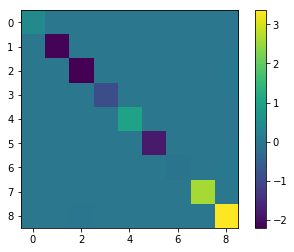

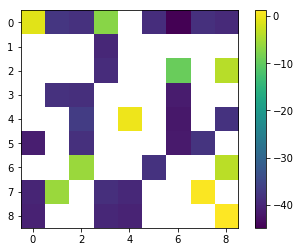

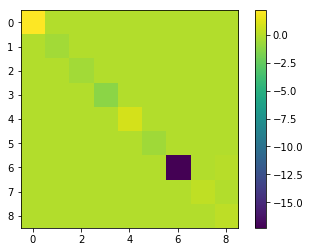

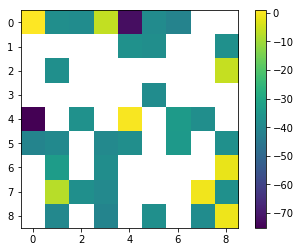

In [41]:
plt.figure(0)
plt.imshow(C_mat_test/mean_ratio)
plt.colorbar()

plt.figure(1)
plt.imshow(np.log(C_mat_test/mean_ratio))
plt.colorbar()

plt.figure(2)
plt.imshow(controlMatrix_test_scaled)
plt.colorbar()

plt.figure(3)
plt.imshow(np.log(controlMatrix_test_scaled))
plt.colorbar()

controlMatrix_true_diag = np.zeros(nzernike)
for ii in range(nzernike):
    controlMatrix_true_diag[ii] = controlMatrix_true[ii,ii]
CMt_min = np.min(abs(controlMatrix_true_diag))
CMt_max = np.max(abs(controlMatrix_true_diag))

controlMatrix_test_scaled_nondiag = np.zeros(np.shape(controlMatrix_test_scaled))
controlMatrix_test_scaled_nondiag[:,:] = controlMatrix_test_scaled[:,:]
for jj in range(nzernike):
    controlMatrix_test_scaled_nondiag[jj,jj] = 0

print "Percentage of non-diagonal elements with value >=1% of the true min:"
print str((len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_min/100)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_min/100)])) + " pixels"
print "Percentage of non-diagonal elements with value >=10% of the true min:"
print str((len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_min/10)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_min/10)])) + " pixels"
print "Percentage of non-diagonal elements with value >=50% of the true min:"
print str((len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_min/2)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_min/2)])) + " pixels"
print "Percentage of non-diagonal elements with value >= the true min:" %(np.min(abs(controlMatrix_true_diag)))
print str((len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_min/1)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_min/1)])) + " pixels"
print "Percentage of non-diagonal elements with value > the true max:" %(np.max(abs(controlMatrix_true_diag)))
print str((len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_max/1)])/((diameter**2.0 - diameter)))*100.0) + " = " + str(len(controlMatrix_test_scaled_nondiag[abs(controlMatrix_test_scaled_nondiag)>=(CMt_max/1)])) + " pixels"
print "Percentage of elements the diagonal entries occupy:"
print str((1.0/diameter)*100.0) + " = " + str(diameter) + " pixels"

In [42]:
print float(np.count_nonzero(aotools.zernike(1, diameter)))/(diameter**2)

0.786865234375
